In [ ]:
!pip install img2vec_pytorch

In [1]:
GROUND_TRUTH_PATH = 'test_data/test.txt'
TEST_DATA_PATH = 'test_data/test_images'
HERO_IMAGE_PATH = 'hero_images'

In [2]:
with open(GROUND_TRUTH_PATH, 'r') as f:
    lines = f.readlines()
    lines = [x.strip() for x in lines]
ground_truth = list(map(lambda x: x.split('\t'), lines))
ground_truth[0]

['Jinx_630613568339321_round1_Dr.-Mundo_06-04-2021.mp4_65_1.jpg', 'Jinx']

In [3]:
import os
import utils
from PIL import Image

Ashe_231705051716794_round3_Ashe_06-07-2021.mp4_26_2.jpg Ashe


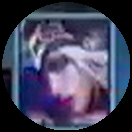

In [4]:
f, label = ground_truth[12]
print(f, label)
timg = Image.open(os.path.join(TEST_DATA_PATH, f))
limg = Image.open(os.path.join(HERO_IMAGE_PATH, label + ".png"))
utils.process_test_image(timg)

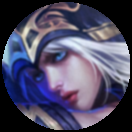

In [5]:
utils.process_train_image(limg)

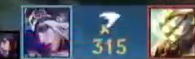

In [6]:
import numpy as np
import cv2
def detect_circle_avatar(org_img: Image, padding=5, min_radius=20):
    img = np.array(org_img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_blurred = cv2.bilateralFilter(gray, 11, 30, 30)

    # tune circles size
    detected_circles = cv2.HoughCircles(gray_blurred,
                            cv2.HOUGH_GRADIENT, 1,
                            param1=50,
                            param2=30,
                            minDist=img.shape[1] // 2,
                            minRadius=img.shape[0] // 4,
                            maxRadius=img.shape[0] // 2)

    if detected_circles is not None:
        # Convert the circle parameters a, b and r to integers.
        detected_circles = np.uint16(np.around(detected_circles))

        for pt in detected_circles[0, :]:
            a, b, r = int(pt[0]), int(pt[1]), int(pt[2])
            if a - r > img.shape[1] // 2:
                continue
            # img = img[max(b-r, 0):min(b+r+padding, img.shape[0]), max(a-r, 0):min(a+r+padding, img.shape[1])]

            # Draw the circumference of the circle.
            cv2.circle(img, (a, b), r, (0, 255, 0), 2)
            # Draw a small circle (of radius 1) to show the center.
            cv2.circle(img, (a, b), 1, (0, 0, 255), 3)

            return Image.fromarray(img), True
    return org_img, False
detect_circle_avatar(timg, min_radius=20)[0]

In [7]:
timg.size

(195, 59)

In [9]:
pics = {}
for file in os.listdir(HERO_IMAGE_PATH):
    if not file.endswith(".png"):
        continue

    img = Image.open(os.path.join(HERO_IMAGE_PATH, file))
    img = utils.process_train_image(img)
    img = np.array(img)
    vec = cv2.calcHist([img],[0],None,[256],[0,256])
    pics[file[:-4]] = vec

In [12]:
acc = 0
for idx, (pic_name, label) in enumerate(ground_truth):
    if not pic_name.endswith(".jpg"):
        continue

    img = Image.open(os.path.join(TEST_DATA_PATH, pic_name))
    img = utils.process_test_image(img)
    img = np.array(img)

    test_embed = cv2.calcHist([img],[0],None,[256],[0,256])

    sims = {}
    for key in list(pics.keys()):
        sims[key] = cv2.compareHist(test_embed,pics[key],cv2.HISTCMP_BHATTACHARYYA)

    d_view = [(v, k) for k, v in sims.items()]
    d_view.sort(reverse=True)

    if label == d_view[0][1]:
        acc += 1
    else:
        print(idx, label, d_view)

print(acc / len(os.listdir(TEST_DATA_PATH)))

0 Jinx [(0.6268759742719737, 'Seraphine'), (0.5497287876138041, 'Soraka'), (0.49888183409739684, 'Kayle'), (0.48576846328257833, 'Leona'), (0.4800002344354143, 'Lee_Sin'), (0.47892002033828174, 'Lux'), (0.4783398637146007, 'Nautilus'), (0.43632397854510846, 'Janna'), (0.4353754643085772, 'Fiora'), (0.4268950112460827, 'KhaZix'), (0.4144678905729285, 'Braum'), (0.41402806068037745, 'Ornn'), (0.4139543931802159, 'Kayn'), (0.4132148496417957, 'Pyke'), (0.40977493005923554, 'Rakan'), (0.4072881730588902, 'Galio'), (0.4032259287235006, 'Xayah'), (0.4022257015082116, 'Zeri'), (0.39405430670979164, 'Vladimir'), (0.39228606710506403, 'Twitch'), (0.3915646375522605, 'Rammus'), (0.38732142079376153, 'Brand'), (0.3869813066762026, 'Malphite'), (0.3798501339494634, 'Vi'), (0.37791733656525234, 'Jayce'), (0.3758399547257082, 'Pantheon'), (0.37453447624179304, 'Lillia'), (0.3733159506199656, 'Master_Yi'), (0.3729813842109121, 'Sett'), (0.37239482709814153, 'Blitzcrank'), (0.3718162075230974, 'Sion')

In [8]:
import cv2

path='location_of_images'
im1 = cv2.imread(path+'/'+'first.jpg',0)
hist1 = cv2.calcHist([im1],[0],None,[256],[0,256])

im2 = cv2.imread(path+'/'+'second.jpg',0)
hist2 = cv2.calcHist([im2],[0],None,[256],[0,256])

a=cv2.compareHist(hist1,hist2,cv2.HISTCMP_BHATTACHARYYA)

print a